# Training model, making prediction and comparison

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
training_data_X = pd.read_csv("../data/training_data_X.csv")
testing_data_X = pd.read_csv("../data/testing_data_X.csv")

In [3]:
training_data_Y = pd.read_csv("../data/training_data_Y.csv",header=None,names=["index","income"])
testing_data_Y = pd.read_csv("../data/testing_data_Y.csv",header=None,names=["index","income"])

In [4]:
training_data_Y = training_data_Y["income"]
testing_data_Y = testing_data_Y["income"]

In [5]:
testing_data_Y.head(10)
len(testing_data_Y[testing_data_Y==1])

3772

In [6]:
#define a prediction result report
from sklearn.metrics import classification_report
def prediction_evaluation(model_name,model,test_X,test_Y):
    y_pred = model.predict(test_X)
    cm = metrics.confusion_matrix(test_Y, y_pred)
    plt.figure(figsize=(5,5))
    # resulting confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["<=50k",">50k"], yticklabels=["<=50k",">50k"])
    
    # classificatioon reprot
    print(classification_report(test_Y, y_pred, \
                            target_names = ["<=50k",">50k"]))
    # accuracy reprot
    print("#### {0} accuracy = {1:5.1f}%".format(model_name,100.0 * model.score(test_X, test_Y)))
    
    plt.show()

# 1. The first model to fit is Logistic Regression

In [7]:
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

In [8]:
model_1 = linear_model.LogisticRegression()

model_1.fit(training_data_X, training_data_Y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

      <=50k       0.88      0.93      0.90     11543
       >50k       0.73      0.60      0.66      3772

avg / total       0.84      0.85      0.84     15315

#### Logistic Regression accuracy =  84.8%


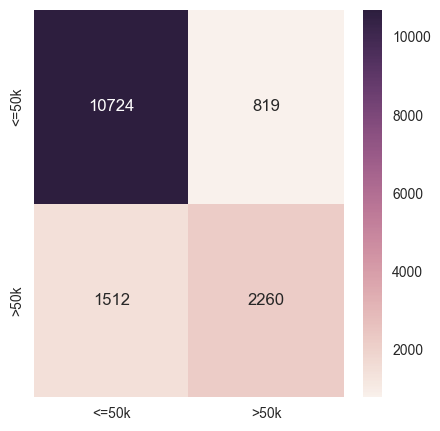

In [9]:
prediction_evaluation("Logistic Regression",model_1,testing_data_X,testing_data_Y)

# 2. The second model to fit is Random Forest

In [10]:
# let's try Random Forests
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Let's build our model and train it all at once
model_2 = RandomForestClassifier(n_estimators=60, max_depth=None,
                             min_samples_split=1, random_state=0)

model_2.fit(training_data_X, training_data_Y)
y_pred = model_2.predict(testing_data_X)

             precision    recall  f1-score   support

      <=50k       0.88      0.94      0.91     11543
       >50k       0.76      0.59      0.67      3772

avg / total       0.85      0.85      0.85     15315

#### Random Forest accuracy =  85.3%


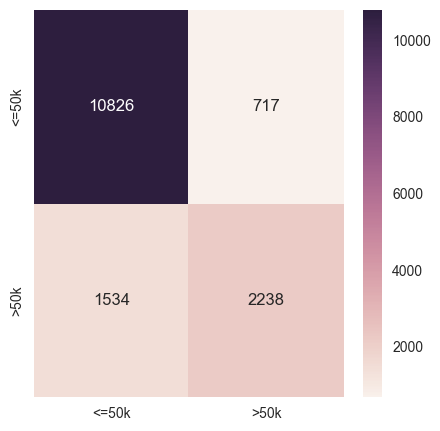

In [12]:
prediction_evaluation("Random Forest",model_2,testing_data_X,testing_data_Y)

# 3. The third model to fit is Gradient Boosted Machine 

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.utils import check_random_state

In [21]:
model_3 = GradientBoostingClassifier(n_estimators=60, random_state=check_random_state(0), max_depth=6)
model_3.fit(training_data_X, training_data_Y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto',
              random_state=<mtrand.RandomState object at 0x000001E24A9225E8>,
              subsample=1.0, verbose=0, warm_start=False)

             precision    recall  f1-score   support

      <=50k       0.88      0.94      0.91     11543
       >50k       0.78      0.62      0.69      3772

avg / total       0.86      0.86      0.86     15315

#### Gradient Boosted Classifier accuracy =  86.2%


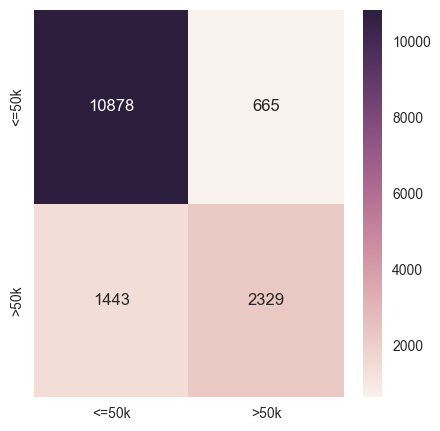

In [22]:
prediction_evaluation("Gradient Boosted Classifier", model_3, testing_data_X,testing_data_Y)

# Tuning parameters using grid search

In [16]:
from sklearn.grid_search import GridSearchCV

In [17]:
#Implements a grid search on specified parameters and returns the best parameter value.
def get_best_param(estimator,X_train, y_train,param_grid):

    best_param_model = GridSearchCV(estimator=estimator, param_grid=param_grid)
    best_param_model.fit(X_train, y_train)
    best_param = best_param_model.best_params_
    
    return best_param

In [25]:
# let's try this on Gradient Boosted Classifier
# first define the parameters to tune
param_grid_3 = {'max_depth':list(range(1,20))}

# this might take some time! 
best_param = get_best_param(model_3,training_data_X, training_data_Y,param_grid_3)
print(best_param)

{'max_depth': 4}


             precision    recall  f1-score   support

      <=50k       0.88      0.95      0.91     11543
       >50k       0.79      0.61      0.69      3772

avg / total       0.86      0.86      0.86     15315

#### Gradient Boosted Classifier accuracy =  86.3%


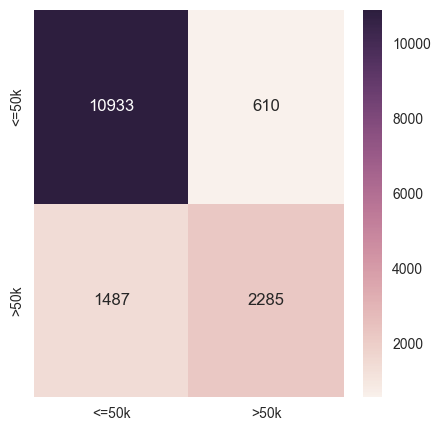

In [26]:
# we should use the tuned parameter to get beetr
model_3 = GradientBoostingClassifier(n_estimators=60, random_state=check_random_state(0), max_depth=4)
model_3.fit(training_data_X, training_data_Y)
prediction_evaluation("Gradient Boosted Classifier", model_3, testing_data_X,testing_data_Y)

# summary

### Gradient Boosted Classifier is the best model of the three, with an overall accuracy of 86.3%, followed by Random Forest with an accuracy of 85.3%. The last one is Logistical Regression Model ending with an accuracy of 84.8%. 
#### Noticed that with the tuned parameter of max_depth = 4, the precision improved from 86.2% to 86.3%. Theoretically, I should tune more parameters to get a more objective comparison, but the tuning process takes ages to run. Due to time limit, the tuning process was done on just one parameter of the last model.